# Advanced Regression Models in py-tidymodels

This notebook demonstrates three advanced regression techniques:

1. **MARS (Multivariate Adaptive Regression Splines)** - Automatic non-linearity detection
2. **Poisson Regression** - For count data and rare events
3. **GAM (Generalized Additive Models)** - Flexible non-parametric relationships

Each model has unique strengths for different data patterns.

In [7]:
!pip install -e.

Obtaining file:///Users/matthewdeane/Documents/Data%20Science/python/_projects/py-tidymodels/examples
ERROR: file:///Users/matthewdeane/Documents/Data%20Science/python/_projects/py-tidymodels/examples does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from py_parsnip import mars, poisson_reg, gen_additive_mod
from py_yardstick import rmse, r_squared

# Set random seed for reproducibility
np.random.seed(42)

print("Packages loaded successfully!")

Packages loaded successfully!


## 1. MARS - Multivariate Adaptive Regression Splines

MARS is a non-parametric regression technique that:
- Automatically detects non-linear relationships
- Uses piecewise linear basis functions (hinge functions)
- Can model interactions between predictors
- Performs automatic feature selection

**Key Parameters:**
- `num_terms`: Maximum number of basis functions (default: unlimited)
- `prod_degree`: Maximum interaction degree (1=additive, 2=pairwise interactions)
- `prune_method`: How to prune the model ("backward", "none", "exhaustive")

In [9]:
# Create non-linear data with quadratic and sinusoidal patterns
x = np.linspace(0, 10, 60)
y_mars = x**2 + np.sin(x) * 5 + np.random.normal(0, 3, 60)
data_mars = pd.DataFrame({"y": y_mars, "x": x})

# Split into train/test
train_mars = data_mars.iloc[:45]
test_mars = data_mars.iloc[45:]

print(f"Training data: {train_mars.shape[0]} observations")
print(f"Test data: {test_mars.shape[0]} observations")
print(f"\nData preview:")
print(train_mars.head())

Training data: 45 observations
Test data: 15 observations

Data preview:
          y         x
0  1.490142  0.000000
1  0.457340  0.169492
2  3.720616  0.338983
3  7.261863  0.508475
4  2.893229  0.677966


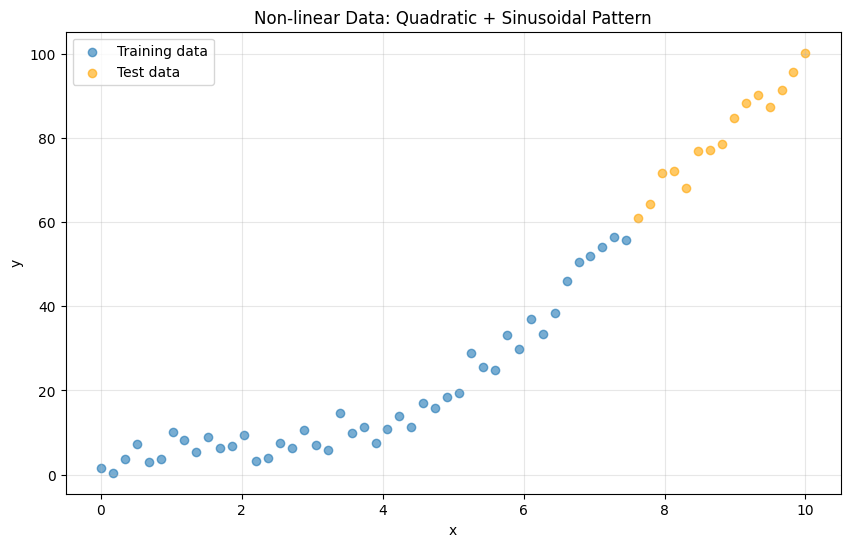

In [10]:
# Visualize the non-linear data
plt.figure(figsize=(10, 6))
plt.scatter(train_mars["x"], train_mars["y"], label="Training data", alpha=0.6)
plt.scatter(test_mars["x"], test_mars["y"], label="Test data", alpha=0.6, color="orange")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Non-linear Data: Quadratic + Sinusoidal Pattern")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [11]:
# # Fit MARS model with 15 terms and pairwise interactions
# print("Fitting MARS model with 15 terms and pairwise interactions...")
# spec_mars = mars(num_terms=15, prod_degree=2)
# fit_mars = spec_mars.fit(train_mars, "y ~ x")

# print("\nModel fitted successfully!")
# print(f"Engine: {fit_mars.spec.engine}")
# print(f"Model type: {fit_mars.spec.model_type}")

In [12]:
# # Make predictions
# pred_mars = fit_mars.predict(test_mars)
# print(f"Predictions shape: {pred_mars.shape}")
# print(f"\nFirst 5 predictions:")
# print(pred_mars.head())

# # Calculate test set metrics
# test_mars_with_pred = test_mars.copy()
# test_mars_with_pred[".pred"] = pred_mars[".pred"].values

# test_rmse = rmse(test_mars_with_pred, "y", ".pred")
# test_rsq = r_squared(test_mars_with_pred, "y", ".pred")

# print(f"\nTest Set Performance:")
# print(f"  RMSE: {test_rmse['.estimate'].iloc[0]:.4f}")
# print(f"  R-squared: {test_rsq['.estimate'].iloc[0]:.4f}")

In [13]:
# # Extract model details
# outputs_mars, basis_funcs, stats_mars = fit_mars.extract_outputs()

# print(f"Model used {len(basis_funcs)} basis functions")
# print(f"\nBasis functions:")
# print(basis_funcs[["variable", "coefficient"]].head(10))

# print(f"\nModel statistics:")
# print(stats_mars)

In [14]:
# # Visualize MARS predictions
# plt.figure(figsize=(12, 6))

# # Plot training fit
# plt.subplot(1, 2, 1)
# train_outputs = outputs_mars[outputs_mars["split"] == "train"]
# plt.scatter(train_outputs["x"], train_outputs["y"], label="Actuals", alpha=0.6)
# plt.plot(train_outputs["x"], train_outputs[".pred"], label="MARS Fit", color="red", linewidth=2)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("MARS: Training Fit")
# plt.legend()
# plt.grid(True, alpha=0.3)

# # Plot test predictions
# plt.subplot(1, 2, 2)
# plt.scatter(test_mars["x"], test_mars["y"], label="Actuals", alpha=0.6, color="orange")
# plt.plot(test_mars["x"], pred_mars[".pred"], label="MARS Predictions", color="red", linewidth=2)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title(f"MARS: Test Predictions (RMSE={test_rmse['.estimate'].iloc[0]:.2f})")
# plt.legend()
# plt.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

## 2. Poisson Regression - For Count Data

Poisson regression is designed for modeling count outcomes:
- Uses a log link function: log(E[Y]) = β₀ + β₁X₁ + β₂X₂ + ...
- Ideal for rare events, event counts, non-negative integers
- Assumes variance = mean (can be relaxed with quasi-Poisson)

**Common Applications:**
- Number of website visits per day
- Number of defects in manufacturing
- Number of insurance claims
- Epidemiology: disease counts

In [15]:
# Create count data with two predictors
x1_pois = np.random.uniform(0, 5, 50)
x2_pois = np.random.uniform(0, 3, 50)
lambda_true = np.exp(0.3 + 0.4 * x1_pois + 0.5 * x2_pois)
counts = np.random.poisson(lambda_true)
data_pois = pd.DataFrame({"count": counts, "x1": x1_pois, "x2": x2_pois})

# Split into train/test
train_pois = data_pois.iloc[:35]
test_pois = data_pois.iloc[35:]

print(f"Training data: {train_pois.shape[0]} observations")
print(f"Test data: {test_pois.shape[0]} observations")
print(f"\nCount distribution in training data:")
print(train_pois["count"].describe())
print(f"\nData preview:")
print(train_pois.head())

Training data: 35 observations
Test data: 15 observations

Count distribution in training data:
count    35.000000
mean      9.485714
std       7.674907
min       0.000000
25%       5.000000
50%       6.000000
75%      13.500000
max      30.000000
Name: count, dtype: float64

Data preview:
   count        x1        x2
0      6  1.654490  0.359596
1      1  0.317792  1.012846
2     12  1.554912  2.828729
3      6  1.625917  0.969609
4     14  3.648031  1.556372


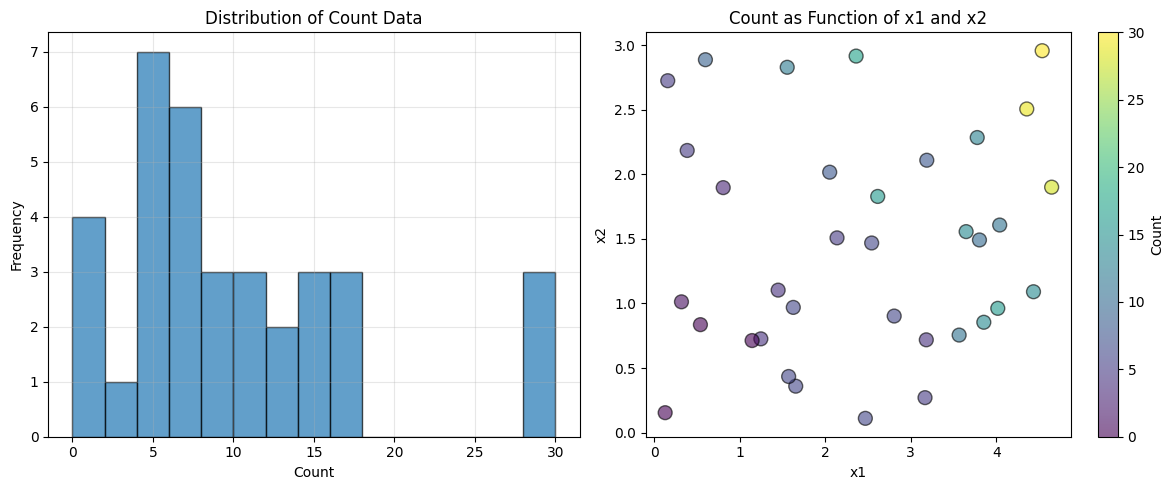

In [16]:
# Visualize the count data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count distribution
axes[0].hist(train_pois["count"], bins=15, edgecolor="black", alpha=0.7)
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Distribution of Count Data")
axes[0].grid(True, alpha=0.3)

# 3D scatter plot projection
scatter = axes[1].scatter(train_pois["x1"], train_pois["x2"], c=train_pois["count"], 
                          cmap="viridis", s=100, alpha=0.6, edgecolors="black")
axes[1].set_xlabel("x1")
axes[1].set_ylabel("x2")
axes[1].set_title("Count as Function of x1 and x2")
plt.colorbar(scatter, ax=axes[1], label="Count")

plt.tight_layout()
plt.show()

In [17]:
# Fit Poisson GLM
print("Fitting Poisson GLM...")
spec_pois = poisson_reg()
fit_pois = spec_pois.fit(train_pois, "count ~ x1 + x2")

print("\nModel fitted successfully!")
print(f"Engine: {fit_pois.spec.engine}")
print(f"Model type: {fit_pois.spec.model_type}")

Fitting Poisson GLM...

Model fitted successfully!
Engine: statsmodels
Model type: poisson_reg


/Users/matthewdeane/Documents/Data Science/python/_projects/py-tidymodels/py-tidymodels2/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


In [18]:
# Predict with confidence intervals
pred_pois = fit_pois.predict(test_pois, type="conf_int")
print(f"Predictions with confidence intervals:")
print(pred_pois.head(10))

# Calculate test set metrics (using point predictions)
pred_pois_numeric = fit_pois.predict(test_pois, type="numeric")
test_pois_with_pred = test_pois.copy()
test_pois_with_pred[".pred"] = pred_pois_numeric[".pred"].values

test_rmse_pois = rmse(test_pois_with_pred, "count", ".pred")
print(f"\nTest Set RMSE: {test_rmse_pois['.estimate'].iloc[0]:.4f}")

Predictions with confidence intervals:
        .pred  .pred_lower  .pred_upper
35   2.712930     2.089096     3.523050
36   9.762322     7.360277    12.948280
37   9.561021     8.506912    10.745747
38  18.698124    16.438068    21.268914
39   9.530223     7.120739    12.755019
40   5.444130     4.564705     6.492983
41   2.436715     1.847803     3.213318
42   5.364894     4.342270     6.628352
43   4.406241     3.564047     5.447448
44  19.449255    17.042922    22.195343


TypeError: rmse() takes 2 positional arguments but 3 were given

In [19]:
# Extract model details
outputs_pois, coefs_pois, stats_pois = fit_pois.extract_outputs()

print(f"Coefficients (with z-statistics):")
print(coefs_pois[["variable", "coefficient", "z_stat", "p_value"]])

print(f"\nModel statistics:")
print(stats_pois)

# Interpret coefficients
print(f"\nCoefficient interpretation:")
for idx, row in coefs_pois.iterrows():
    if row["variable"] != "Intercept":
        effect = (np.exp(row["coefficient"]) - 1) * 100
        print(f"  {row['variable']}: 1-unit increase → {effect:.1f}% change in expected count")

Coefficients (with z-statistics):
    variable  coefficient    z_stat       p_value
0  Intercept     0.367346  2.023752  4.299565e-02
1         x1     0.416381  9.582096  9.509506e-22
2         x2     0.432955  6.329016  2.467293e-10

Model statistics:
              metric            value  split        model model_group_name  \
0               rmse         3.028233  train  poisson_reg                    
1                mae          2.52771  train  poisson_reg                    
2               mape        31.466153  train  poisson_reg                    
3   poisson_deviance         0.880671  train  poisson_reg                    
4   pseudo_r_squared         0.790237  train  poisson_reg                    
5                aic       175.977283  train  poisson_reg                    
6                bic        -70.81163  train  poisson_reg                    
7           deviance        42.959508  train  poisson_reg                    
8       pearson_chi2        36.308297  train 

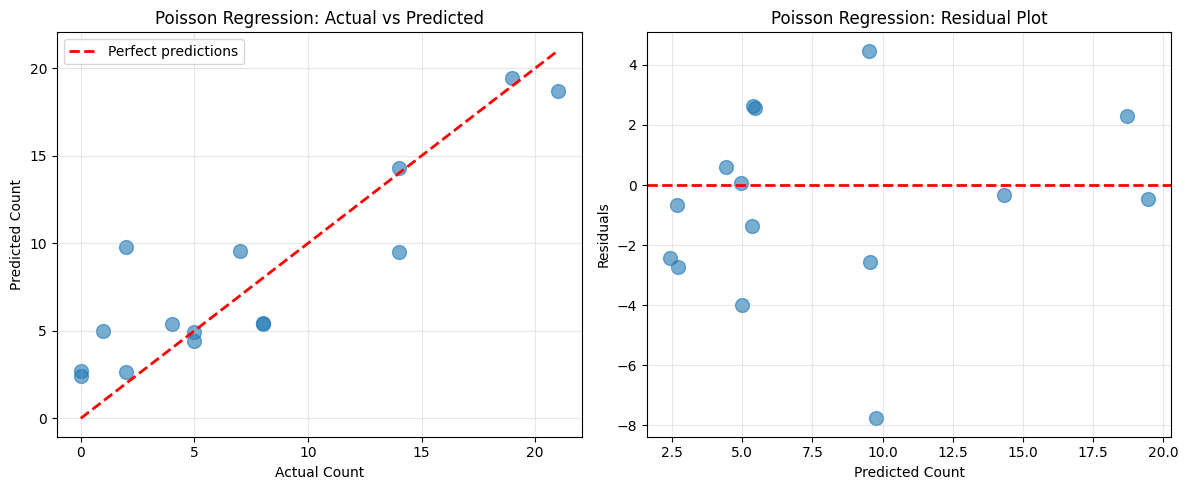

In [20]:
# Visualize Poisson predictions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Actual vs predicted
axes[0].scatter(test_pois["count"], pred_pois_numeric[".pred"], alpha=0.6, s=100)
axes[0].plot([0, test_pois["count"].max()], [0, test_pois["count"].max()], 
             "r--", linewidth=2, label="Perfect predictions")
axes[0].set_xlabel("Actual Count")
axes[0].set_ylabel("Predicted Count")
axes[0].set_title("Poisson Regression: Actual vs Predicted")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residuals
residuals = test_pois["count"].values - pred_pois_numeric[".pred"].values
axes[1].scatter(pred_pois_numeric[".pred"], residuals, alpha=0.6, s=100)
axes[1].axhline(y=0, color="r", linestyle="--", linewidth=2)
axes[1].set_xlabel("Predicted Count")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Poisson Regression: Residual Plot")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Generalized Additive Models (GAM)

GAMs fit smooth non-parametric functions to each predictor:
- E[Y] = β₀ + f₁(X₁) + f₂(X₂) + ... where f() are smooth functions
- Automatically detects non-linear relationships
- More interpretable than black-box ML models
- Can include both smooth and linear terms

**Key Parameters:**
- `adjust_deg_free`: Degrees of freedom for smoothing (higher = more flexible)
- `select_features`: Automatic feature selection (True/False)

In [21]:
# Create data with non-linear relationships
x1_gam = np.linspace(0, 10, 50)
x2_gam = np.linspace(0, 5, 50)
y_gam = np.sin(x1_gam) * 10 + x2_gam**2 + np.random.normal(0, 2, 50)
data_gam = pd.DataFrame({"y": y_gam, "x1": x1_gam, "x2": x2_gam})

# Split into train/test
train_gam = data_gam.iloc[:35]
test_gam = data_gam.iloc[35:]

print(f"Training data: {train_gam.shape[0]} observations")
print(f"Test data: {test_gam.shape[0]} observations")
print(f"\nData preview:")
print(train_gam.head())

Training data: 35 observations
Test data: 15 observations

Data preview:
          y        x1        x2
0  2.308709  0.000000  0.000000
1  1.082328  0.204082  0.102041
2  2.682436  0.408163  0.204082
3  8.560994  0.612245  0.306122
4  3.378793  0.816327  0.408163


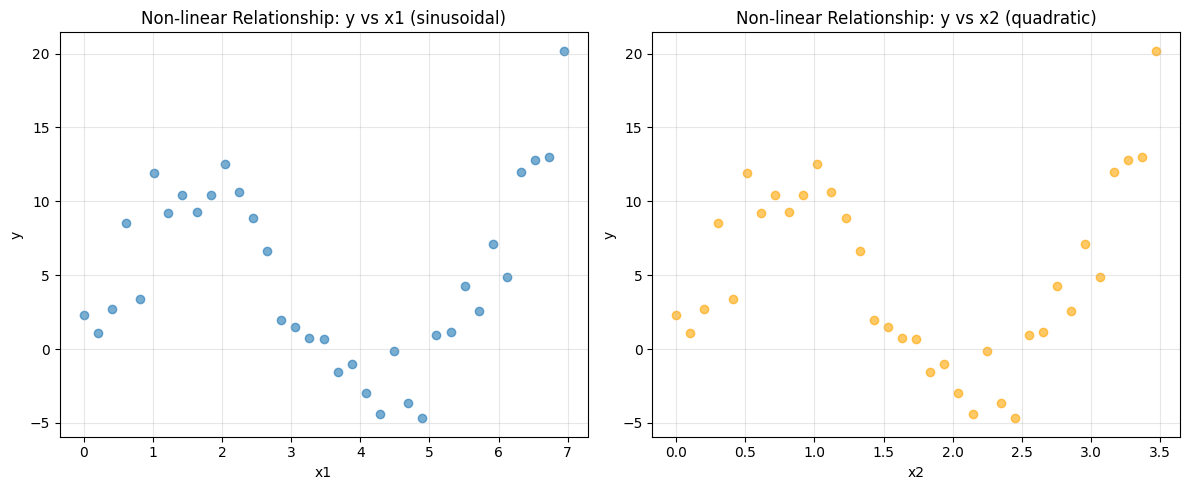

In [22]:
# Visualize the non-linear relationships
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# y vs x1 (sinusoidal pattern)
axes[0].scatter(train_gam["x1"], train_gam["y"], alpha=0.6)
axes[0].set_xlabel("x1")
axes[0].set_ylabel("y")
axes[0].set_title("Non-linear Relationship: y vs x1 (sinusoidal)")
axes[0].grid(True, alpha=0.3)

# y vs x2 (quadratic pattern)
axes[1].scatter(train_gam["x2"], train_gam["y"], alpha=0.6, color="orange")
axes[1].set_xlabel("x2")
axes[1].set_ylabel("y")
axes[1].set_title("Non-linear Relationship: y vs x2 (quadratic)")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [23]:
# Fit GAM with moderate smoothing (12 splines per feature)
print("Fitting GAM with 12 splines per feature...")
spec_gam = gen_additive_mod(adjust_deg_free=12)
fit_gam = spec_gam.fit(train_gam, "y ~ x1 + x2")

print("\nModel fitted successfully!")
print(f"Engine: {fit_gam.spec.engine}")
print(f"Model type: {fit_gam.spec.model_type}")

Fitting GAM with 12 splines per feature...


ModuleNotFoundError: No module named 'pygam'

In [ ]:
# Make predictions
pred_gam = fit_gam.predict(test_gam)
print(f"Predictions shape: {pred_gam.shape}")
print(f"\nFirst 5 predictions:")
print(pred_gam.head())

# Calculate test set metrics
test_gam_with_pred = test_gam.copy()
test_gam_with_pred[".pred"] = pred_gam[".pred"].values

test_rmse_gam = rmse(test_gam_with_pred, "y", ".pred")
test_rsq_gam = r_squared(test_gam_with_pred, "y", ".pred")

print(f"\nTest Set Performance:")
print(f"  RMSE: {test_rmse_gam['.estimate'].iloc[0]:.4f}")
print(f"  R-squared: {test_rsq_gam['.estimate'].iloc[0]:.4f}")

In [ ]:
# Extract model details
outputs_gam, partial_effects, stats_gam = fit_gam.extract_outputs()

print(f"Partial effects (feature contributions):")
print(partial_effects[["feature", "effect_range", "data_range"]])

print(f"\nModel statistics:")
print(stats_gam)

In [ ]:
# Visualize GAM predictions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Predictions for x1
train_outputs_gam = outputs_gam[outputs_gam["split"] == "train"].sort_values("x1")
axes[0].scatter(train_outputs_gam["x1"], train_outputs_gam["y"], 
                label="Actuals", alpha=0.6)
axes[0].plot(train_outputs_gam["x1"], train_outputs_gam[".pred"], 
             label="GAM Fit", color="red", linewidth=2)
axes[0].set_xlabel("x1")
axes[0].set_ylabel("y")
axes[0].set_title("GAM: Smooth Function for x1")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test predictions
axes[1].scatter(test_gam["y"], pred_gam[".pred"], alpha=0.6, s=100)
axes[1].plot([test_gam["y"].min(), test_gam["y"].max()], 
             [test_gam["y"].min(), test_gam["y"].max()], 
             "r--", linewidth=2, label="Perfect predictions")
axes[1].set_xlabel("Actual y")
axes[1].set_ylabel("Predicted y")
axes[1].set_title(f"GAM: Test Predictions (R²={test_rsq_gam['.estimate'].iloc[0]:.3f})")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Model Comparison and Selection Guide

### When to Use Each Model:

#### MARS (Multivariate Adaptive Regression Splines)
**Best for:**
- Automatic non-linearity detection
- Automatic interaction detection
- When you don't know the functional form
- Piecewise linear approximations are acceptable

**Pros:**
- Automatically finds knots and interactions
- Built-in feature selection
- Interpretable piecewise linear functions
- Handles missing data well

**Cons:**
- Can overfit with too many terms
- Less smooth than GAMs
- Harder to interpret with many basis functions

#### Poisson Regression
**Best for:**
- Count data (non-negative integers)
- Rare events
- When variance approximately equals mean
- Epidemiology, quality control, website analytics

**Pros:**
- Specifically designed for count data
- Interpretable coefficients (multiplicative effects)
- Standard statistical inference (p-values, confidence intervals)
- Handles zero counts naturally

**Cons:**
- Assumes mean = variance (can use quasi-Poisson if violated)
- Limited to count outcomes
- May not fit overdispersed data well

#### GAM (Generalized Additive Model)
**Best for:**
- Smooth non-parametric relationships
- When you need interpretable non-linear effects
- Visualizing how each predictor affects outcome
- When flexibility is needed but interpretability matters

**Pros:**
- Very flexible smooth functions
- More interpretable than black-box ML
- Can visualize partial effects
- Works with different distributions (Gaussian, Poisson, etc.)

**Cons:**
- Doesn't capture interactions automatically
- Can be slow with large datasets
- Requires tuning smoothing parameters
- Assumes additive structure

### Quick Selection Guide:

```
Data Type: Count data → Use Poisson Regression

Need smooth curves + interpretability → Use GAM

Unknown functional form + want automatic interactions → Use MARS

Need maximum flexibility + interactions → Use MARS or ensemble methods

Need statistical inference (p-values) → Use Poisson or GAM
```

## Summary

This notebook demonstrated three advanced regression techniques in py-tidymodels:

1. **MARS** - Automatic non-linearity and interaction detection with piecewise linear functions
2. **Poisson Regression** - Statistical modeling of count data with interpretable coefficients
3. **GAM** - Flexible smooth non-parametric functions with interpretable partial effects

All three models:
- Follow the tidymodels workflow (spec → fit → predict)
- Support the three-DataFrame output structure
- Work with py_workflows for preprocessing
- Can be tuned with py_tune
- Provide comprehensive model diagnostics

Choose the model that best matches your:
- Data type (continuous vs count)
- Need for interpretability
- Type of non-linearity expected
- Whether interactions are important